# CZII YOLO11 Training Baseline
 We created a training set adapted to YOLO from [the dataset baseline](https://www.kaggle.com/code/itsuki9180/czii-making-datasets-for-yolo).

In this notebook, we actually use it to train YOLO so that it can infer the xy coordinates of particles through 2D object detection.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Install and Import modules

In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 54.6 MB/s eta 0:00:00


In [4]:
from tqdm import tqdm
import glob, os
from ultralytics import YOLO
from google.colab import drive
drive.mount('/content/drive')
import torch
from ultralytics import YOLO
from torch.cuda.amp import autocast, GradScaler
import torchvision
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive


In [ ]:
# Load a pretrained model
model_path = '/content/drive/My Drive/project3/yolo11-pytorch-default-v1/yolo11l.pt'
model = YOLO(model_path)
# Print a confirmation message
print(f"Model loaded from {model_path}")

Model loaded from /content/drive/My Drive/project3/yolo11-pytorch-default-v1/yolo11l.pt


# Prepare to train and instance YOLOmodel

In [ ]:

print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"Number of CUDA Devices: {torch.cuda.device_count()}")
print(torch.cuda.is_available())
print(torch.__version__)
print(torchvision.__version__)

True
1
CUDA Available: True
Number of CUDA Devices: 1
True
2.5.1+cu121
0.20.1+cu121


# Let's train YOLO!

In [ ]:

# Train the model on GPU with checkpointing
_ = model.train(
    data='/content/drive/My Drive/project3/czii-cryo-et-object-identification/datasets/czii_det2d/czii_conf.yaml',
    epochs=100,  # Total number of epochs
    warmup_epochs=10,
    optimizer='AdamW',
    cos_lr=True,
    lr0=3e-4,
    lrf=0.03,
    imgsz=640,  # Adjusted image size
    device="0",  # Set to use CUDA device 0
    weight_decay=0.005,
    batch=32,
    scale=0,
    flipud=0.5,
    fliplr=0.5,
    degrees=45,
    shear=5,
    mixup=0.2,
    copy_paste=0.25,
    seed=8620,  # (｡•◡•｡)

)

# Print a message indicating training is starting
print("Training started on GPU")



Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/My Drive/project3/yolo11-pytorch-default-v1/yolo11l.pt, data=/content/drive/My Drive/project3/czii-cryo-et-object-identification/datasets/czii_det2d/czii_conf.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=8620, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, 

100%|██████████| 755k/755k [00:00<00:00, 136MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 325MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/My Drive/project3/czii-cryo-et-object-identification/datasets/czii_det2d/labels/train.cache... 1104 images, 272 backgrounds, 0 corrupt: 100%|██████████| 1104/1104 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/My Drive/project3/czii-cryo-et-object-identification/datasets/czii_det2d/labels/val.cache... 184 images, 30 backgrounds, 0 corrupt: 100%|██████████| 184/184 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.0003, momentum=0.937) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      21.5G      2.247      2.807      1.613        481        640: 100%|██████████| 35/35 [01:33<00:00,  2.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:41<00:00, 13.82s/it]

                   all        184       2640      0.388     0.0171        0.2     0.0307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      21.1G      1.322      1.384      1.089        423        640: 100%|██████████| 35/35 [00:33<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.49s/it]

                   all        184       2640      0.616      0.355      0.419      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      21.3G      1.257      1.256      1.061        359        640: 100%|██████████| 35/35 [00:33<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all        184       2640      0.592      0.505      0.545      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      21.3G       1.24      1.238      1.051        418        640: 100%|██████████| 35/35 [00:33<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all        184       2640      0.565      0.517      0.541      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100        21G      1.176      1.185      1.032        488        640: 100%|██████████| 35/35 [00:33<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all        184       2640      0.751        0.5      0.595      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      21.4G      1.203      1.184      1.034        538        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.05it/s]

                   all        184       2640      0.466      0.593      0.564      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      21.3G      1.142      1.166      1.018        417        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.09it/s]

                   all        184       2640      0.572       0.62        0.6       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      21.2G      1.139       1.14      1.013        332        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all        184       2640      0.557      0.599      0.595      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      21.5G      1.128       1.12       1.01        362        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.567      0.564      0.595      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      21.1G      1.112       1.11      1.003        447        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.568      0.571      0.593      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      21.2G      1.125      1.116      1.012        456        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.04it/s]

                   all        184       2640      0.527      0.584      0.592      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      21.1G      1.124      1.107      1.007        460        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all        184       2640      0.587      0.595      0.605      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      21.2G      1.094      1.096      0.997        512        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all        184       2640      0.502      0.575      0.596      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      21.5G      1.088      1.092     0.9927        329        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        184       2640       0.59      0.593       0.61      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      21.1G      1.089      1.077      0.992        433        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all        184       2640      0.643       0.58      0.609      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      21.2G      1.085      1.068     0.9929        554        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        184       2640      0.607      0.596      0.629      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      21.2G       1.07      1.045     0.9882        415        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all        184       2640      0.583      0.581      0.594      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      21.2G       1.05      1.051     0.9805        447        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all        184       2640      0.567       0.58      0.591      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      21.2G      1.082      1.047      0.989        351        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.08it/s]

                   all        184       2640      0.581      0.623      0.608      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      21.1G      1.057       1.02     0.9797        475        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        184       2640      0.503      0.575      0.569      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      21.2G      1.039      1.002     0.9753        446        640: 100%|██████████| 35/35 [00:32<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all        184       2640      0.556      0.592      0.587      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      21.1G      1.024     0.9873      0.973        334        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all        184       2640       0.61      0.567      0.607       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      21.1G      1.043      1.006     0.9755        283        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.556      0.577      0.569      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      21.2G      1.016     0.9895     0.9678        386        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        184       2640      0.611      0.513      0.574      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      21.2G      1.067      0.998     0.9802        264        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.10it/s]

                   all        184       2640      0.656      0.588      0.609      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      21.2G      1.013     0.9579     0.9653        406        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.631      0.589      0.607      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      21.1G       1.01     0.9613     0.9653        443        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        184       2640        0.6      0.571      0.599      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      21.2G     0.9911     0.9426     0.9573        254        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        184       2640      0.582      0.608      0.601      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      21.4G     0.9987     0.9523     0.9587        365        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all        184       2640       0.61      0.557      0.597      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100        21G     0.9798      0.928     0.9518        503        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        184       2640      0.592      0.572      0.585       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      21.3G     0.9763     0.9361     0.9512        424        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        184       2640      0.641      0.572      0.594      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      21.1G      0.966     0.9103     0.9484        482        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.624      0.564      0.612      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      21.2G     0.9664     0.8954     0.9482        439        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        184       2640      0.567      0.515      0.569      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      21.2G     0.9878     0.8932      0.955        438        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        184       2640      0.628      0.587      0.598      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      21.1G     0.9804     0.8724     0.9494        420        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        184       2640      0.654      0.487      0.554      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      21.2G     0.9549     0.8554     0.9427        349        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.588      0.579      0.593      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      21.2G     0.9277     0.8432     0.9358        410        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        184       2640        0.6      0.574      0.588      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      21.2G      0.906     0.8241      0.929        354        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.561       0.57      0.576      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      21.3G     0.9257     0.8384      0.934        338        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.582      0.549      0.561      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      21.1G     0.9155     0.8215     0.9305        315        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.607      0.585      0.607      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      21.2G     0.9216     0.8162     0.9324        294        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.628      0.574      0.606      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      21.1G     0.8805     0.7901       0.92        332        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        184       2640       0.61      0.544      0.579       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      21.3G     0.8686     0.7672      0.917        433        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.574      0.543      0.573      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      21.3G     0.8949     0.7706     0.9231        361        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.631      0.535      0.582      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      21.2G     0.8748     0.7545      0.918        366        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.583      0.565      0.569      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      21.3G     0.8746     0.7722     0.9163        417        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.555      0.562       0.58      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      21.2G     0.8298     0.7254     0.9045        375        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.559      0.553      0.565      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      21.5G     0.8514     0.7274     0.9088        410        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.599      0.571      0.584      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      21.3G     0.8334     0.7264      0.907        430        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        184       2640      0.582      0.531      0.566      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      21.3G     0.8371     0.7155     0.9064        396        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        184       2640      0.629       0.51      0.566      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      21.1G     0.8219     0.7038     0.9008        371        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        184       2640      0.571      0.569      0.569      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      21.1G     0.8168     0.6955     0.9003        424        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.582      0.571      0.581       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      21.2G     0.8021     0.6783     0.8967        378        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        184       2640      0.599      0.515       0.57      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      21.4G     0.8293     0.7023     0.9028        451        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.556      0.515      0.549      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      21.2G     0.7958     0.6753     0.8929        292        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.11it/s]

                   all        184       2640      0.572      0.543      0.566      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      21.1G     0.7705     0.6411     0.8852        375        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.569      0.512      0.548      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      21.4G     0.7859     0.6494     0.8913        441        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.525      0.561      0.552       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      21.2G     0.7709     0.6368     0.8854        281        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        184       2640      0.579      0.517      0.553       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      21.3G     0.7672      0.637     0.8864        330        640: 100%|██████████| 35/35 [00:32<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        184       2640      0.567      0.535       0.55      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100        21G     0.7585     0.6298     0.8824        382        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.12it/s]

                   all        184       2640      0.594      0.547      0.562        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      21.3G      0.765     0.6305     0.8859        431        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.547      0.534      0.556      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      21.3G     0.7387     0.6107     0.8772        434        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]

                   all        184       2640      0.618      0.562      0.589      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      21.2G     0.7362     0.5987     0.8767        471        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]

                   all        184       2640      0.557       0.51      0.539      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      21.1G     0.7435     0.5993     0.8825        446        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.562      0.515      0.547      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      21.2G     0.7276     0.5965     0.8767        466        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        184       2640      0.584      0.516      0.564      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      21.2G     0.7252     0.5895     0.8736        380        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.524      0.492      0.525      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      21.1G     0.7195     0.5903     0.8723        408        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.596      0.535      0.561      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      21.2G     0.7157     0.5919     0.8724        464        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        184       2640      0.562      0.567      0.565      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      21.2G     0.7166      0.586     0.8739        344        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.541      0.535      0.549      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      21.2G     0.7022     0.5745     0.8681        343        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]

                   all        184       2640      0.579      0.512      0.541      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      21.4G     0.7046     0.5726     0.8685        396        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.525      0.518      0.534      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      21.3G     0.7055     0.5697     0.8697        535        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        184       2640      0.582      0.507      0.545      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      21.2G     0.6918     0.5528     0.8641        463        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        184       2640      0.587      0.534      0.554      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      21.3G     0.6845     0.5498      0.865        500        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.535       0.51       0.54      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      21.5G     0.6699      0.538     0.8605        339        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640       0.59      0.533       0.56        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      21.1G     0.6771     0.5416      0.862        464        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]

                   all        184       2640      0.579      0.522      0.552      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      21.1G      0.667     0.5346     0.8615        405        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.571       0.54      0.553      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      21.2G     0.6627     0.5399     0.8612        311        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        184       2640      0.655      0.534      0.562        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      21.1G      0.661     0.5407      0.859        459        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.648      0.499      0.537      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      21.2G     0.6686     0.5423     0.8598        316        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.549      0.544      0.547      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      21.3G     0.6481     0.5256     0.8567        380        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        184       2640      0.541      0.517      0.536       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      21.3G     0.6651     0.5412     0.8611        435        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.514      0.524      0.536       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      21.1G     0.6436     0.5138     0.8547        364        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        184       2640      0.539      0.531      0.542      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      21.2G     0.6542     0.5331     0.8577        531        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.18it/s]

                   all        184       2640      0.592      0.511      0.538      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      21.3G     0.6338     0.5121      0.854        405        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.575      0.522      0.543      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      21.2G     0.6383     0.5069     0.8552        465        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        184       2640       0.54      0.522      0.537      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100        21G       0.64     0.5206     0.8546        349        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        184       2640      0.538      0.531      0.544       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      21.2G     0.6408     0.5167     0.8547        375        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.626       0.51      0.542      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      21.2G     0.6326      0.511     0.8531        491        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.548      0.539      0.545      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      21.1G     0.6403     0.5142     0.8549        465        640: 100%|██████████| 35/35 [00:32<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]

                   all        184       2640      0.566       0.52       0.54      0.397


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      21.2G     0.4885     0.3484     0.8067        308        640: 100%|██████████| 35/35 [00:34<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.568       0.53      0.542      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100        21G     0.4739     0.3368     0.8033        154        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.581      0.519      0.543      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      21.1G     0.4696     0.3294     0.8038        446        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.553      0.523      0.535      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      21.1G     0.4735     0.3342      0.805        207        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]

                   all        184       2640      0.556      0.516      0.535      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      21.1G     0.4705     0.3247      0.804        372        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.553      0.527      0.541      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      21.1G     0.4607     0.3187     0.8028        382        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.14it/s]

                   all        184       2640      0.569      0.525      0.542      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100        21G     0.4524     0.3183     0.8017        366        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.578      0.531      0.547      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      21.1G     0.4484      0.312     0.8006        270        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]

                   all        184       2640      0.553      0.512      0.537      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      21.2G     0.4492     0.3097      0.799        264        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.531      0.518      0.535      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      21.1G     0.4459     0.3103      0.798        271        640: 100%|██████████| 35/35 [00:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.15it/s]

                   all        184       2640      0.558      0.507      0.533      0.389



100 epochs completed in 1.053 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLO11l summary (fused): 464 layers, 25,283,938 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]


                   all        184       2640      0.633      0.588      0.608      0.442
          apo-ferritin        133        506      0.767      0.698      0.766      0.538
    beta-galactosidase        112        200      0.655      0.209      0.302      0.164
              ribosome        145        899      0.646      0.836      0.805      0.586
         thyroglobulin        144        749       0.28      0.297       0.22      0.145
   virus-like-particle        105        286      0.814      0.902      0.945      0.778
Speed: 0.2ms preprocess, 9.4ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to runs/detect/train
Training started on GPU


In [5]:
import torch
torch.cuda.set_device(0)  # Set the device
torch.cuda.manual_seed_all(123)  # Set the seed for reproducibility

In [ ]:
!pip install matplotlib-venn
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.7/901.7 kB 46.1 MB/s eta 0:00:00


In [11]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

In [13]:
# List the contents of the directory to ensure the file exists
!ls '/content/drive/My Drive/runs/detect/train/weights'


best.pt  last.pt


In [14]:
# Load a pretrained model
model_path = '/content/drive/My Drive/runs/detect/train/weights/best.pt'
model = YOLO(model_path)
# Print a confirmation message
print(f"Model loaded from {model_path}")

Model loaded from /content/drive/My Drive/runs/detect/train/weights/best.pt



image 1/1 /content/drive/My Drive/project3/czii-cryo-et-object-identification/datasets/czii_det2d/images/val/TS_5_4_920.png: 640x640 1 apo-ferritin, 12 ribosomes, 4 thyroglobulins, 5 virus-like-particles, 18.6ms
Speed: 7.6ms preprocess, 18.6ms inference, 705.5ms postprocess per image at shape (1, 3, 640, 640)


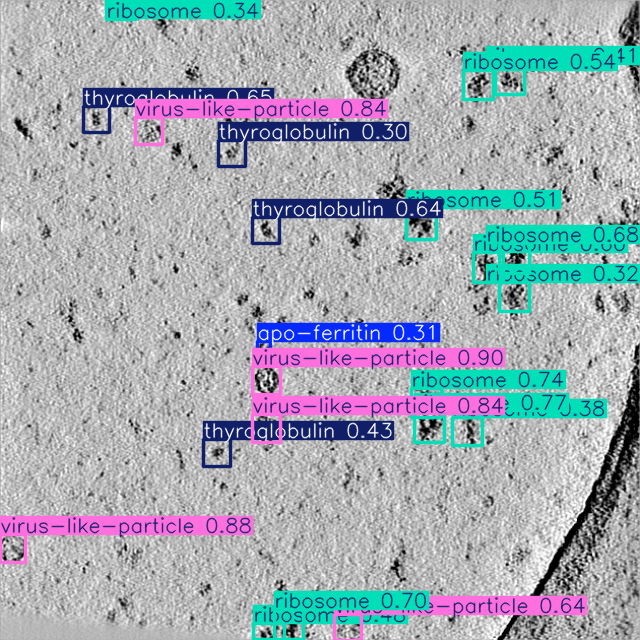

In [17]:
results = model('/content/drive/My Drive/project3/czii-cryo-et-object-identification/datasets/czii_det2d/images/val/TS_5_4_920.png')
results[0].show()

In [16]:
# List the contents of the directory to ensure the file exists
!ls '/content/drive/My Drive/project3/czii-cryo-et-object-identification/datasets/czii_det2d/images/val'


TS_5_4_0.png	 TS_5_4_1260.png  TS_5_4_1540.png  TS_5_4_1820.png  TS_5_4_450.png  TS_5_4_730.png
TS_5_4_1000.png  TS_5_4_1270.png  TS_5_4_1550.png  TS_5_4_1830.png  TS_5_4_460.png  TS_5_4_740.png
TS_5_4_100.png	 TS_5_4_1280.png  TS_5_4_1560.png  TS_5_4_190.png   TS_5_4_470.png  TS_5_4_750.png
TS_5_4_1010.png  TS_5_4_1290.png  TS_5_4_1570.png  TS_5_4_200.png   TS_5_4_480.png  TS_5_4_760.png
TS_5_4_1020.png  TS_5_4_1300.png  TS_5_4_1580.png  TS_5_4_20.png    TS_5_4_490.png  TS_5_4_770.png
TS_5_4_1030.png  TS_5_4_130.png   TS_5_4_1590.png  TS_5_4_210.png   TS_5_4_500.png  TS_5_4_780.png
TS_5_4_1040.png  TS_5_4_1310.png  TS_5_4_1600.png  TS_5_4_220.png   TS_5_4_50.png   TS_5_4_790.png
TS_5_4_1050.png  TS_5_4_1320.png  TS_5_4_160.png   TS_5_4_230.png   TS_5_4_510.png  TS_5_4_800.png
TS_5_4_1060.png  TS_5_4_1330.png  TS_5_4_1610.png  TS_5_4_240.png   TS_5_4_520.png  TS_5_4_80.png
TS_5_4_1070.png  TS_5_4_1340.png  TS_5_4_1620.png  TS_5_4_250.png   TS_5_4_530.png  TS_5_4_810.png
TS_5_4_1080.png

# Prediction example


image 1/1 /content/drive/My Drive/project3/czii-cryo-et-object-identification/datasets/czii_det2d/images/val/TS_5_4_720.png: 640x640 5 apo-ferritins, 2 beta-galactosidases, 11 ribosomes, 8 thyroglobulins, 6 virus-like-particles, 19.4ms
Speed: 2.0ms preprocess, 19.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


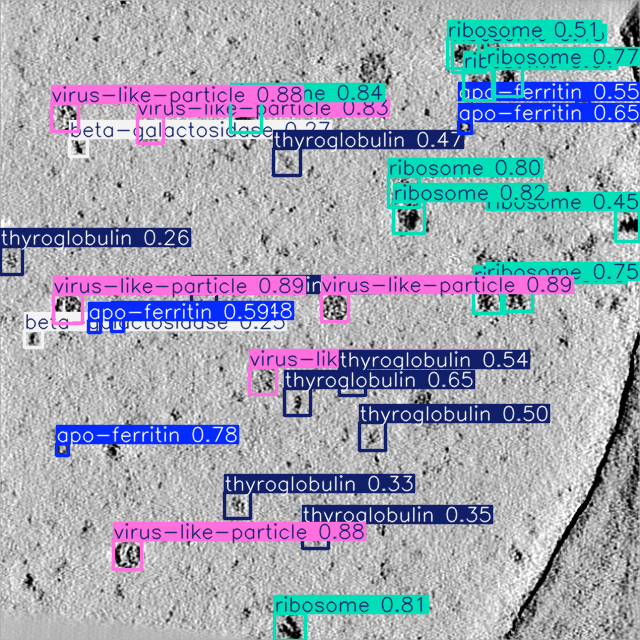

In [18]:
results = model('/content/drive/My Drive/project3/czii-cryo-et-object-identification/datasets/czii_det2d/images/val/TS_5_4_720.png')
results[0].show()

# Continue to [Submission Baseline...](https://www.kaggle.com/code/itsuki9180/czii-yolo11-submission-baseline)